<a href="https://colab.research.google.com/github/chaeyeongSon/pdm09/blob/master/py-tensorflow/tf2_7_fmnist_CNN_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: **Find the best model**
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
tf.random.set_seed(0)

2.3.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import fashion_mnist

(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

4423680/4422102 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display images
- one random image
- 10 representative images

35551


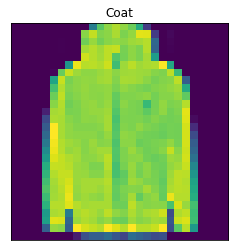

In [4]:
# Code here!
# display one random image from the training set:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

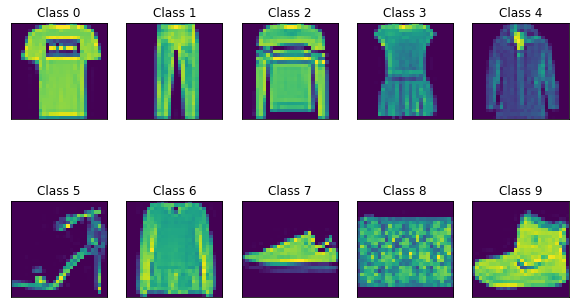

In [5]:
# 10 representative images
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import Conv2D, MaxPool2D

In [6]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

##**CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [7]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    Dense(128, activation='relu'),
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [8]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

In [9]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4227 - accuracy: 0.8513
Epoch 2/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2865 - accuracy: 0.8971
Epoch 3/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2466 - accuracy: 0.9114
Epoch 4/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2171 - accuracy: 0.9193
Epoch 5/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1960 - accuracy: 0.9266
Epoch 6/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1762 - accuracy: 0.9350
Epoch 7/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1619 - accuracy: 0.9397
Epoch 8/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1454 - accuracy: 0.9453
Epoch 9/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1341 - accuracy: 0.9486
Epoch 10/20
1875/1875 [==============================] - 38s 20m

In [10]:
c1f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 2s 6ms/step - loss: 0.3653 - accuracy: 0.9151


[0.3652949631214142, 0.9150999784469604]

## **CNN1 + FCN3**

In [11]:
c1f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    Dense(256, activation='relu'),
    keras.layers.Dropout(0.25), 
    Dense(128, activation='relu'),
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [12]:
c1f3 .summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [13]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.4458 - accuracy: 0.8415
Epoch 2/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2941 - accuracy: 0.8932
Epoch 3/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2476 - accuracy: 0.9095
Epoch 4/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2182 - accuracy: 0.9194
Epoch 5/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1949 - accuracy: 0.9268
Epoch 6/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1731 - accuracy: 0.9358
Epoch 7/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1550 - accuracy: 0.9422
Epoch 8/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1406 - accuracy: 0.9481
Epoch 9/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1257 - accuracy: 0.9522
Epoch 10/20
1875/1875 [==============================] - 53s 28m

In [14]:
c1f3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 3s 8ms/step - loss: 0.4091 - accuracy: 0.9140


[0.4091190695762634, 0.9139999747276306]

## **CNN2 + FCN2**

In [15]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    Dense(128, activation='relu'),
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [16]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [17]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.4296 - accuracy: 0.8462
Epoch 2/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2855 - accuracy: 0.8959
Epoch 3/20
1875/1875 [==============================] - 70s 38ms/step - loss: 0.2410 - accuracy: 0.9108
Epoch 4/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2100 - accuracy: 0.9222
Epoch 5/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1890 - accuracy: 0.9299
Epoch 6/20
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1676 - accuracy: 0.9373
Epoch 7/20
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1518 - accuracy: 0.9426
Epoch 8/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1346 - accuracy: 0.9495
Epoch 9/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1224 - accuracy: 0.9542
Epoch 10/20
1875/1875 [==============================] - 70s 37m

In [18]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 3s 11ms/step - loss: 0.4008 - accuracy: 0.9215


[0.40084490180015564, 0.921500027179718]

## **CNN2 + FCN3**

In [20]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25), 
    Dense(128, activation='relu'),
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [21]:
c2f3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               803072    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

In [22]:
c2f3.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.4531 - accuracy: 0.8383
Epoch 2/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2852 - accuracy: 0.8966
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2386 - accuracy: 0.9133
Epoch 4/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2084 - accuracy: 0.9215
Epoch 5/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1838 - accuracy: 0.9320
Epoch 6/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1647 - accuracy: 0.9391
Epoch 7/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1484 - accuracy: 0.9456
Epoch 8/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1320 - accuracy: 0.9513
Epoch 9/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1179 - accuracy: 0.9556
Epoch 10/20
1875/1875 [==============================] - 80s 43m

In [23]:
c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 4s 12ms/step - loss: 0.3624 - accuracy: 0.9223


[0.3623959720134735, 0.9222999811172485]

# **[DIY] Hidden layer에 따른 정확도**

In [24]:
c1f2score = c1f2.evaluate(X_test, y_test, batch_size = 32)
c1f3score = c1f3.evaluate(X_test, y_test, batch_size = 32)
c2f2score = c2f2.evaluate(X_test, y_test, batch_size = 32)
c2f3score = c2f3.evaluate(X_test, y_test, batch_size = 32)


313/313 [==============================] - 4s 12ms/step - loss: 0.3624 - accuracy: 0.9223


In [25]:
accuracy = [c1f2score[1], c1f3score[1], c2f2score[1], c2f3score[1]]
accuracy

[0.9150999784469604, 0.9139999747276306, 0.921500027179718, 0.9222999811172485]

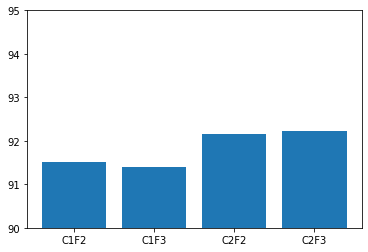

In [28]:
x = np.arange(4)
cnns = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((90, 95))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [30]:
c2f3.save('fmnist_cnn_best.hdf5')

In [32]:
from keras.models import load_model

model = load_model('fmnist_cnn_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 4s 12ms/step - loss: 0.3624 - accuracy: 0.9223


[0.3623959720134735, 0.9222999811172485]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [33]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0526 - accuracy: 0.9800 - val_loss: 0.4111 - val_accuracy: 0.9190
Epoch 2/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0496 - accuracy: 0.9813 - val_loss: 0.3858 - val_accuracy: 0.9206
Epoch 3/20
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0485 - accuracy: 0.9814 - val_loss: 0.4567 - val_accuracy: 0.9143
Epoch 4/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0461 - accuracy: 0.9825 - val_loss: 0.4126 - val_accuracy: 0.9162
Epoch 5/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0463 - accuracy: 0.9825 - val_loss: 0.4563 - val_accuracy: 0.9183
Epoch 6/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0445 - accuracy: 0.9834 - val_loss: 0.4617 - val_accuracy: 0.9218
Epoch 7/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0400 - accuracy: 0.9853 - val_loss: 0.4914 -

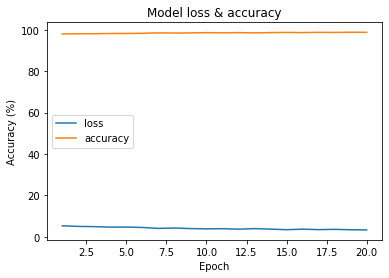

In [34]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list)
plt.plot(range(1,epochs+1),acc_list)
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [35]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

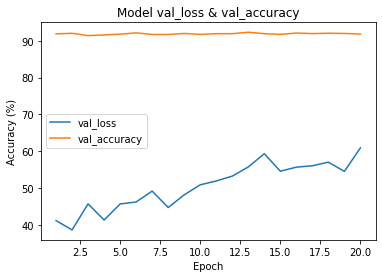

In [36]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

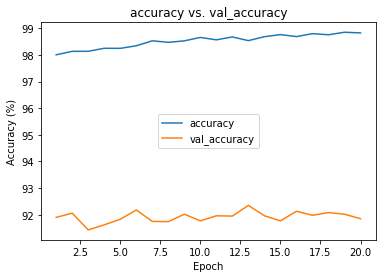

In [37]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

## C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [38]:
# Code here!

hist = c2f3.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0511 - accuracy: 0.9817 - val_loss: 0.4352 - val_accuracy: 0.9188
Epoch 2/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0495 - accuracy: 0.9824 - val_loss: 0.3962 - val_accuracy: 0.9215
Epoch 3/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0457 - accuracy: 0.9835 - val_loss: 0.5045 - val_accuracy: 0.9206
Epoch 4/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0445 - accuracy: 0.9840 - val_loss: 0.4440 - val_accuracy: 0.9225
Epoch 5/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0443 - accuracy: 0.9847 - val_loss: 0.4598 - val_accuracy: 0.9213
Epoch 6/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0444 - accuracy: 0.9844 - val_loss: 0.4457 - val_accuracy: 0.9239
Epoch 7/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0417 - accuracy: 0.9861 - val_loss: 0.4705 -

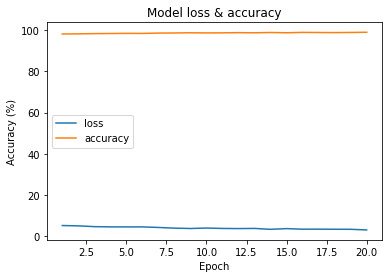

In [39]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list)
plt.plot(range(1,epochs+1),acc_list)
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [40]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

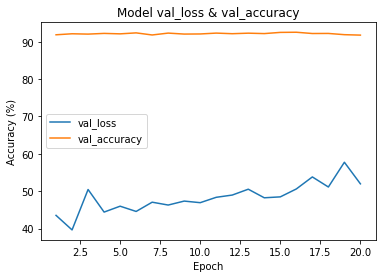

In [41]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

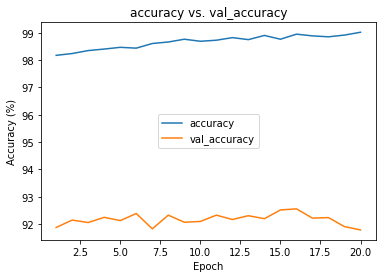

In [44]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [45]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

In [46]:
cp_callback = callbacks.ModelCheckpoint(filepath="./fmnist_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [47]:
# Train CNN model
# Find and save the best model.
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0303 - accuracy: 0.9889 - val_loss: 0.5921 - val_accuracy: 0.9178
Epoch 2/500
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.6020 - val_accuracy: 0.9207
Epoch 3/500
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.5843 - val_accuracy: 0.9203
Epoch 4/500
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0324 - accuracy: 0.9888 - val_loss: 0.5956 - val_accuracy: 0.9185
Epoch 5/500
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0321 - accuracy: 0.9887 - val_loss: 0.6117 - val_accuracy: 0.9197
Epoch 6/500
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0293 - accuracy: 0.9898 - val_loss: 0.6622 - val_accuracy: 0.9207
Epoch 7/500
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0315 - accuracy: 0.9894 - val_loss: 0

In [48]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 3s 11ms/step - loss: 0.8738 - accuracy: 0.9206


[0.8737748265266418, 0.9205999970436096]

## Graph of loss and accuracy
- model: C2F2

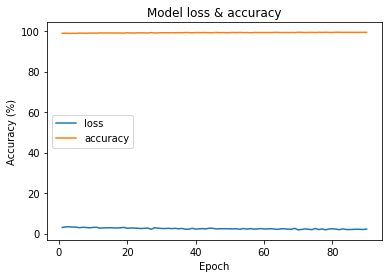

In [51]:
epochs = 90
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [52]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

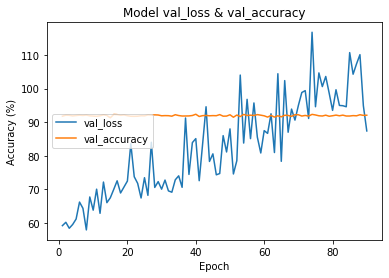

In [53]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [54]:
np.argmax(np.array(vacc_list))

39

In [55]:
vacc_list[np.argmax(np.array(vacc_list))]

92.35000014305115

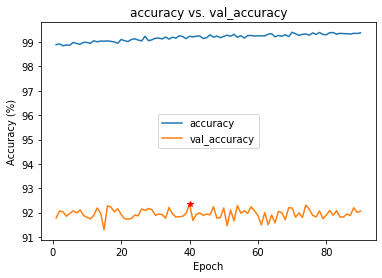

In [56]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 

## 최적화된 모형 불러와서 이용

- callbacks.ModelCheckpoint를 이용해서 트레이닝 중 val_accuacy가 가장 높은 모형을 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

  fmnist_c2f2_best_weights.040-0.9235.hdf5

In [58]:
from keras.models import load_model

model = load_model('fmnist_c2f2_best_weights.040-0.9235.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 4s 11ms/step - loss: 0.8509 - accuracy: 0.9235


[0.8509355187416077, 0.9235000014305115]

## [DIY] C2F3의 best model을 구하시오.

## **CNN2 + FCN3**

In [59]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [60]:
c2f3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [61]:
cp_callback = callbacks.ModelCheckpoint(filepath="./fmnist_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [62]:
hist = c2f3.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5200 - accuracy: 0.8136 - val_loss: 0.3371 - val_accuracy: 0.8789
Epoch 2/500
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3257 - accuracy: 0.8842 - val_loss: 0.2808 - val_accuracy: 0.8965
Epoch 3/500
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2731 - accuracy: 0.9025 - val_loss: 0.2695 - val_accuracy: 0.9049
Epoch 4/500
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2424 - accuracy: 0.9126 - val_loss: 0.2499 - val_accuracy: 0.9098
Epoch 5/500
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2170 - accuracy: 0.9211 - val_loss: 0.2445 - val_accuracy: 0.9145
Epoch 6/500
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1972 - accuracy: 0.9287 - val_loss: 0.2457 - val_accuracy: 0.9129
Epoch 7/500
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1800 - accuracy: 0.9332 - val_loss: 0

In [63]:
c2f3.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 3s 11ms/step - loss: 0.6339 - accuracy: 0.9207


[0.6338903307914734, 0.9207000136375427]

## Graph of loss and accuracy
- model: C2F3

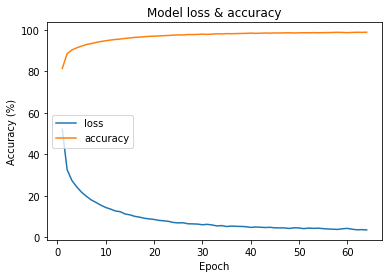

In [64]:
epochs = 64
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [65]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

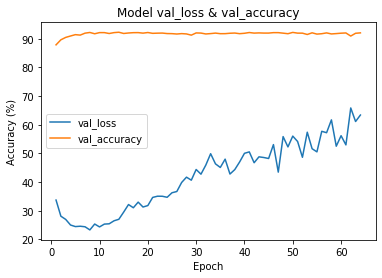

In [66]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [67]:
np.argmax(np.array(vacc_list))

13

In [68]:
vacc_list[np.argmax(np.array(vacc_list))]

92.29000210762024

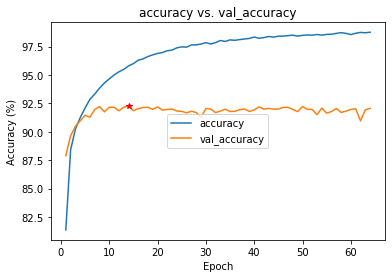

In [69]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')

## 최적화된 모형 불러와서 이용

- callbacks.ModelCheckpoint를 이용해서 트레이닝 중 val_accuacy가 가장 높은 모형을 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

  fmnist_c2f3_best_weights.014-0.9229.hdf5

In [70]:
from keras.models import load_model

model = load_model('fmnist_c2f3_best_weights.014-0.9229.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 3s 11ms/step - loss: 0.2700 - accuracy: 0.9229


[0.2699875235557556, 0.9229000210762024]